#1. 이해하기

##1.1 권한 흐름

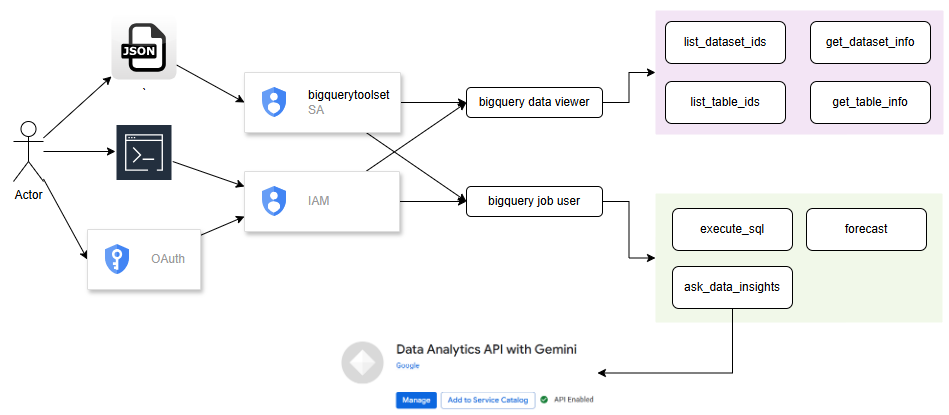

##1.2 코드 흐름 이해

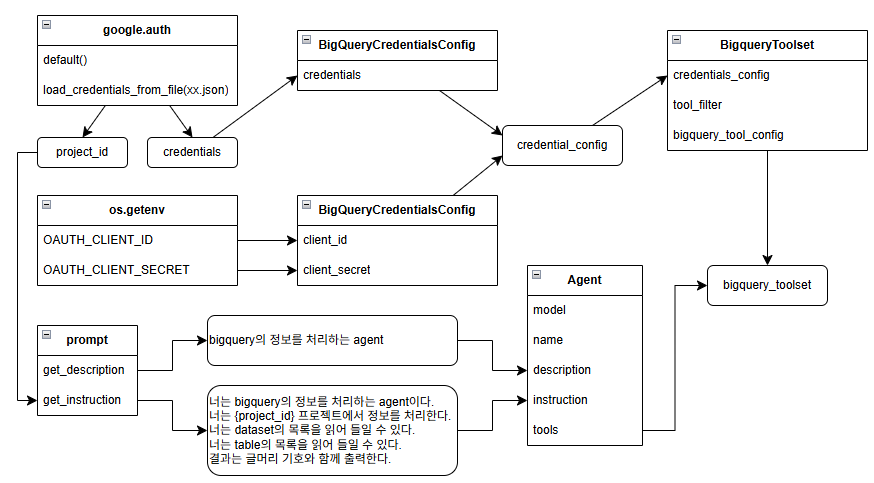

#2. 인증

##2.1 default

###2.1.1 폴더 생성



```
mkdir bigquery
cd bigquery/
```



###2.1.2 환경설정



```
 python -m venv .myenv
 source .myenv/bin/activate
```





```
pip install google-adk
```



###2.1.3 adk init



```
adk create default-auth
```



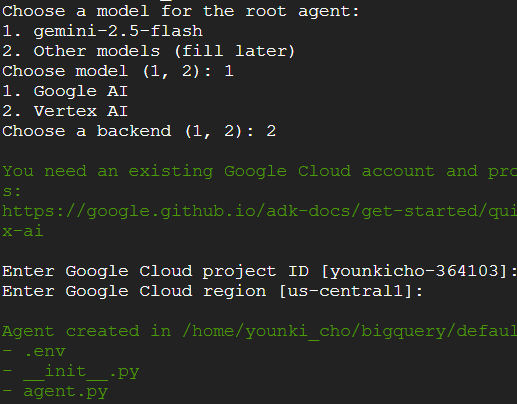

###2.1.4 code 생성 및 수정



```
# prompt.py
def get_instruction(project_id:str):
    instruction=f"""
    너는 bigquery의 정보를 처리하는 agent이다.
    너는 {project_id} 프로젝트에서 정보를 처리한다.
    너는 dataset의 목록을 읽어 들일 수 있다.
    너는 table의 목록을 읽어 들일 수 있다.
    결과는 글머리 기호와 함께 출력한다.
    """
    return instruction

def get_description():
    return "bigquery의 정보를 처리하는 agent"
```





```
# agent.py
from google.adk.agents.llm_agent import Agent
#######################################################
# 추가
from .prompt import (
    get_instruction,
    get_description
)
from google.adk.tools.bigquery import (
    BigQueryCredentialsConfig,
    BigQueryToolset
)
import google.auth

credentials, project_id = google.auth.default()
print(f"Credentials: {credentials}")
print(f"Project ID: {project_id}")

credentials_config = BigQueryCredentialsConfig(
    credentials=credentials
)

bigquery_toolset = BigQueryToolset(
    credentials_config=credentials_config,
    
)
#######################################################

root_agent = Agent(
    model='gemini-2.5-flash',
    name='root_agent',
    #######################################################
    # 수정 및 추가
    description=get_description(),
    instruction=get_instruction(project_id),
    tools=[bigquery_toolset]
    #######################################################
)
```



##2.2 Service Account

2.2.1 Service Account 생성



```
export PROJECT_ID=$(gcloud config get-value project)
echo $PROJECT_ID
```





```
gcloud iam service-accounts create bigquerytoolset

gcloud projects add-iam-policy-binding $PROJECT_ID \
--member serviceAccount:bigquerytoolset@$PROJECT_ID.iam.gserviceaccount.com \
--role roles/bigquery.dataViewer

gcloud projects add-iam-policy-binding $PROJECT_ID \
--member serviceAccount:bigquerytoolset@$PROJECT_ID.iam.gserviceaccount.com \
--role roles/bigquery.jobUser
```



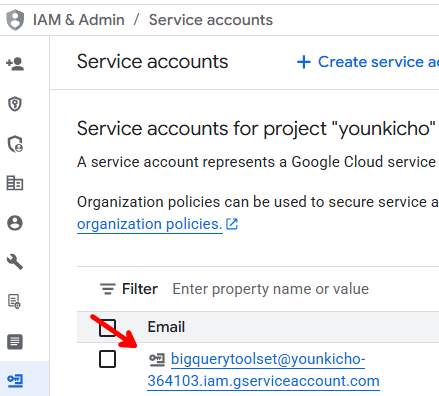

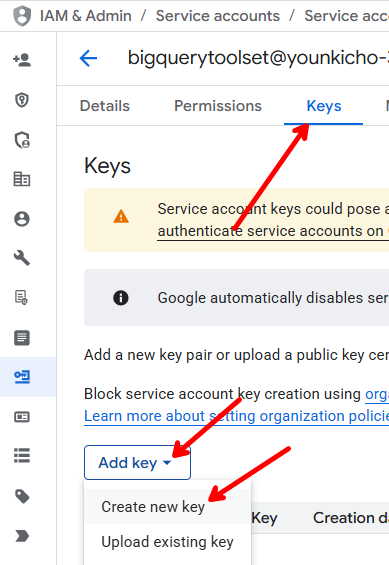

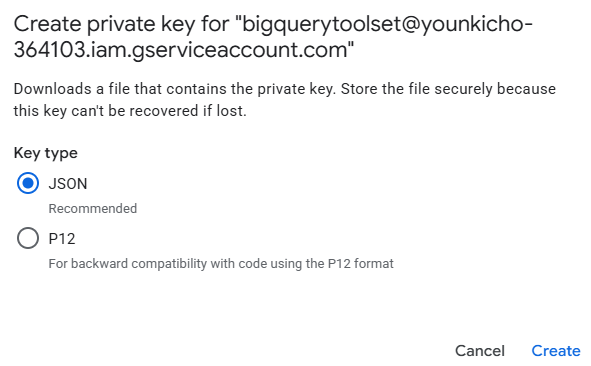

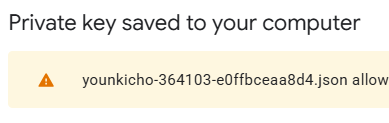

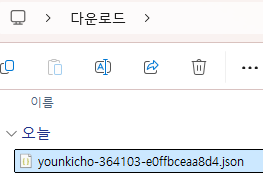

###2.2.2 vscode(windows)

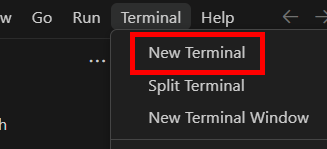

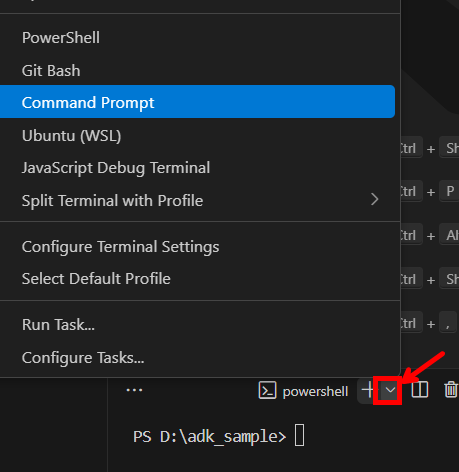

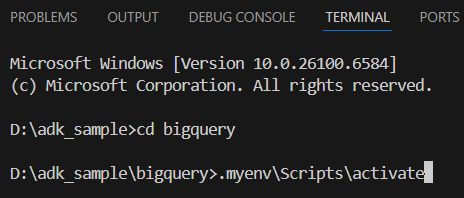

###2.2.3 adk init

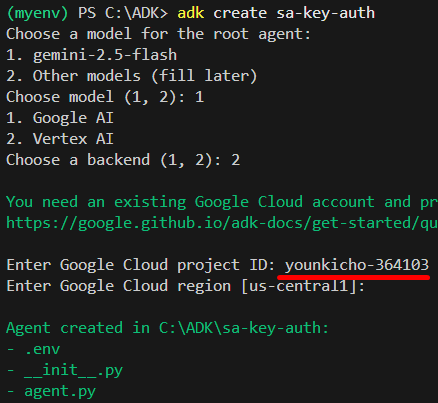

###2.2.4 코드 생성 및 수정



```
# prompt.py
def get_instruction(project_id:str):
    instruction=f"""
    너는 bigquery의 정보를 처리하는 agent이다.
    너는 {project_id} 프로젝트에서 정보를 처리한다.
    너는 dataset의 목록을 읽어 들일 수 있다.
    너는 table의 목록을 읽어 들일 수 있다.
    결과는 글머리 기호와 함께 출력한다.
    """
    return instruction

def get_description():
    return "bigquery의 정보를 처리하는 agent"
```





```
# agent.py
from google.adk.agents.llm_agent import Agent
#######################################################
# 추가
from .prompt import (
    get_instruction,
    get_description
)
from google.adk.tools.bigquery import (
    BigQueryCredentialsConfig,
    BigQueryToolset
)
import google.auth

# The full path to the credentials file.
SA_KEY_PATH = "c:\ADK\default-auth\sa-key.json"
credentials, project_id = google.auth.load_credentials_from_file(SA_KEY_PATH)
credentials_config = BigQueryCredentialsConfig(
    credentials=credentials
)

bigquery_toolset = BigQueryToolset(
    credentials_config=credentials_config,
    
)
#######################################################

root_agent = Agent(
    model='gemini-2.5-flash',
    name='root_agent',
    #######################################################
    # 수정 및 추가
    description=get_description(),
    instruction=get_instruction(project_id),
    tools=[bigquery_toolset]
    #######################################################
)
```



##2.3 OAuth2

###2.3.1 Google Auth Platform 설정

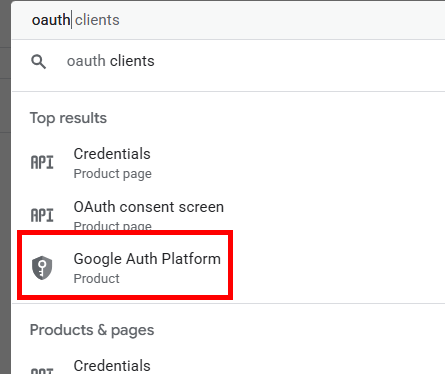

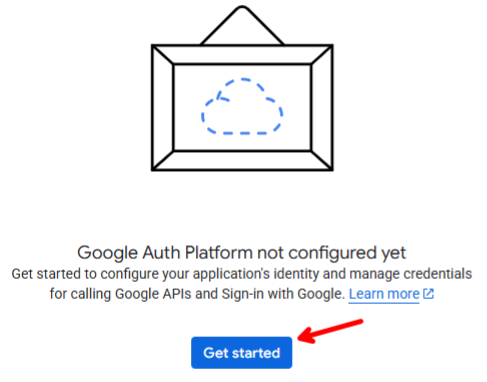

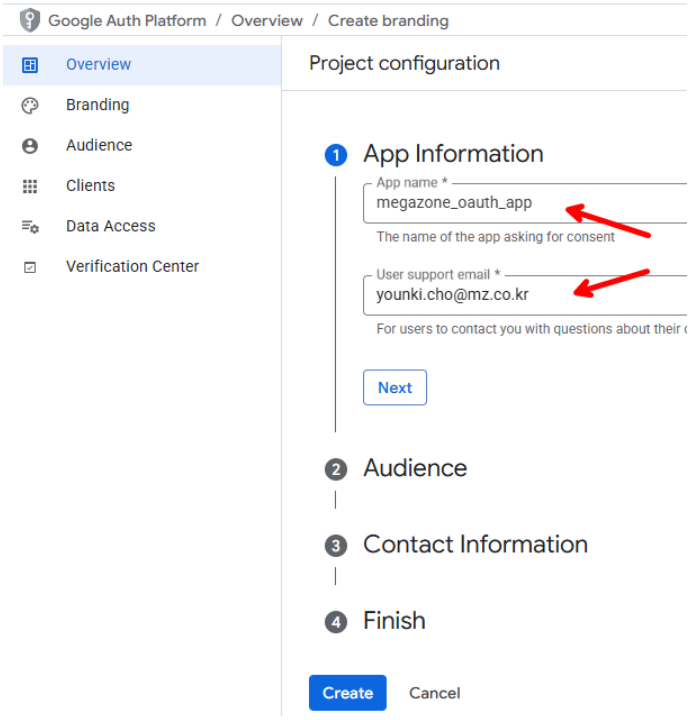

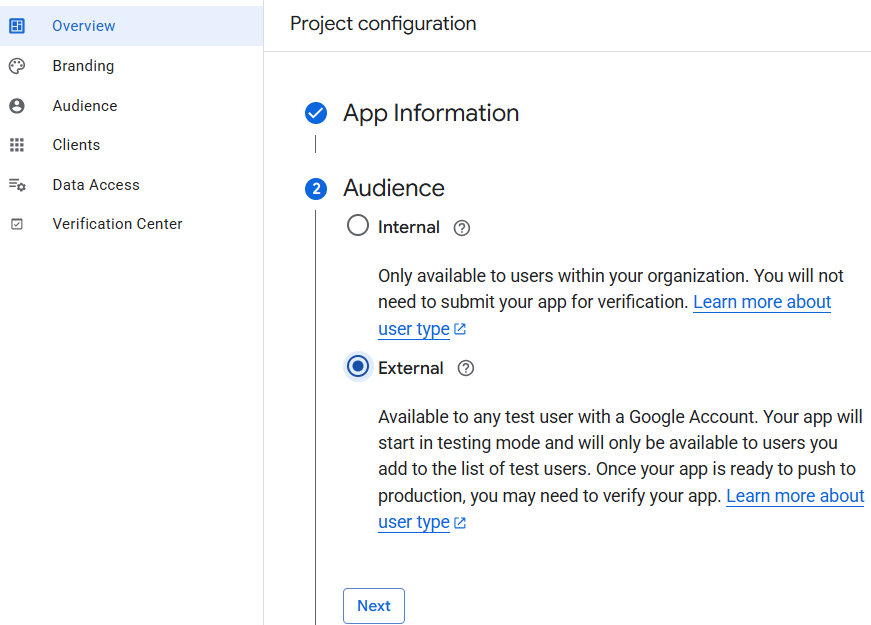

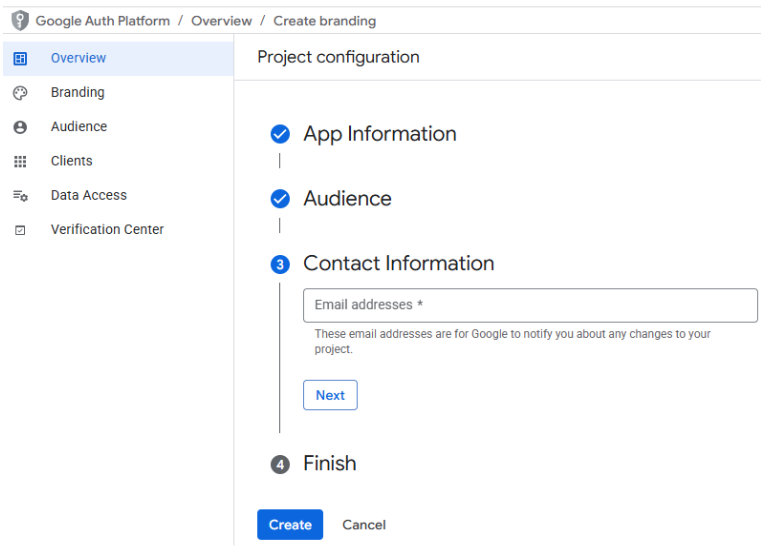

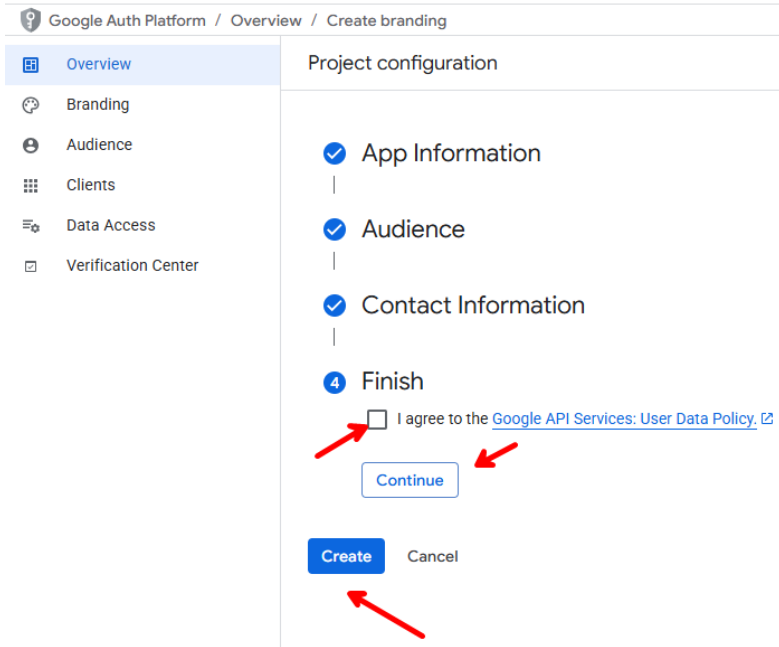

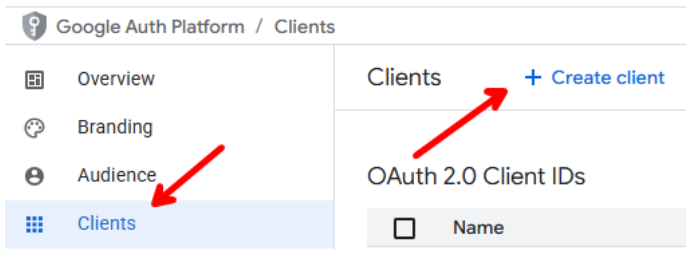

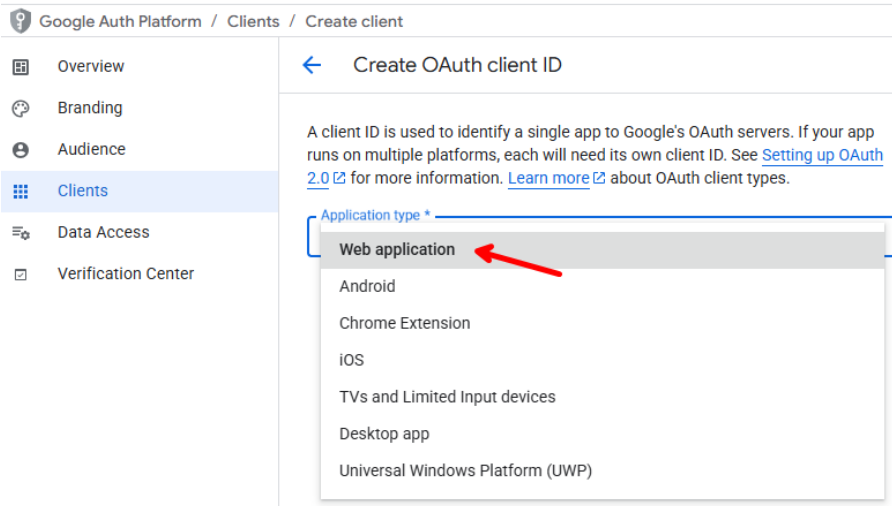

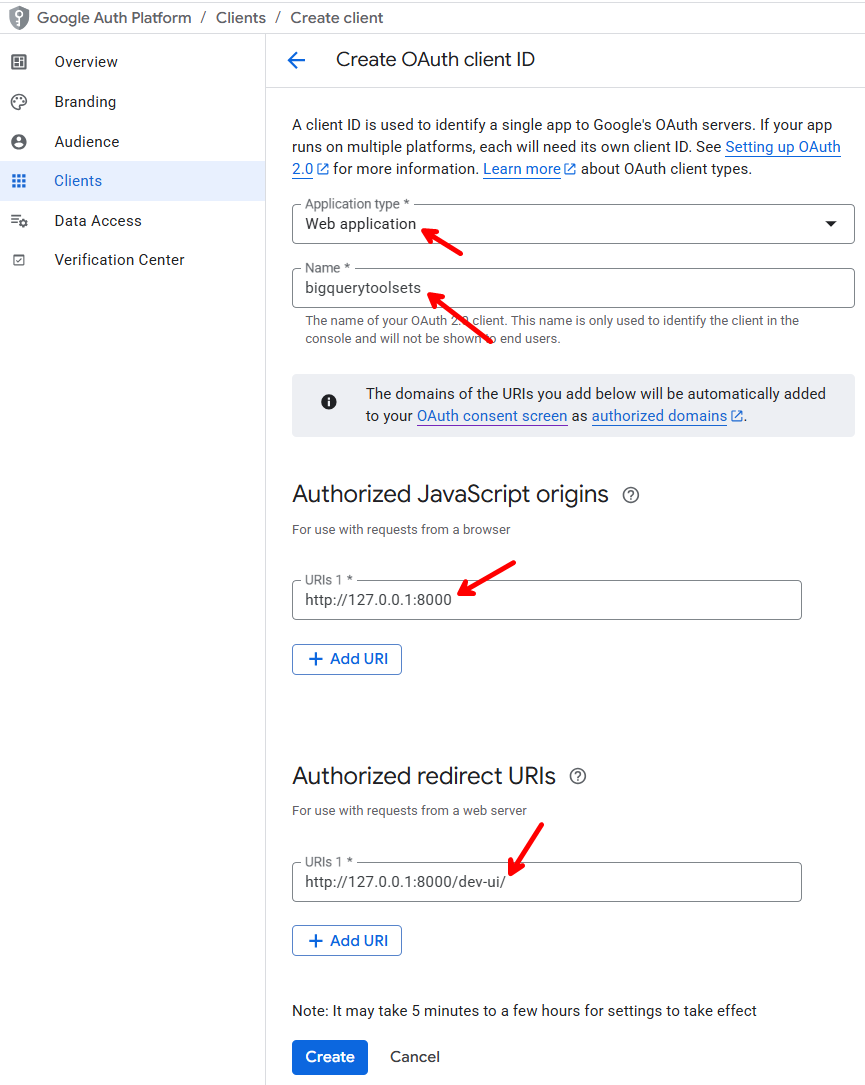

###2.3.2 agent.py



```
from google.adk.agents.llm_agent import Agent
from .prompt import (
    get_instruction,
    get_description
)
from google.adk.tools.bigquery import (
    BigQueryCredentialsConfig,
    BigQueryToolset
)
#######################################################
# insert 처리
from google.adk.tools.bigquery.config import (
    BigQueryToolConfig,
    WriteMode
)

import os
from dotenv import load_dotenv

load_dotenv()

client_id = os.getenv("OAUTH_CLIENT_ID")
client_secret = os.getenv("OAUTH_CLIENT_SECRET")
project_id = os.getenv("GOOGLE_CLOUD_PROJECT")

print(f"project_id: {project_id}")
print(f"client_id: {client_id}")
print(f"client_secret: {client_secret}")

credentials_config = BigQueryCredentialsConfig(
    client_id=client_id,
    client_secret=client_secret,
)
#######################################################
# ALLOWED를 통해 insert 처리
tool_config = BigQueryToolConfig(write_mode=WriteMode.ALLOWED)

bigquery_toolset = BigQueryToolset(
    credentials_config=credentials_config,
    #######################################################
    # tool 연동
    bigquery_tool_config=tool_config
)

root_agent = Agent(
    model='gemini-2.5-flash',
    name='root_agent',
    description=get_description(),
    instruction=get_instruction(project_id),
    tools=[bigquery_toolset]
)
```



#3. Access

##3.1 BLOCKED

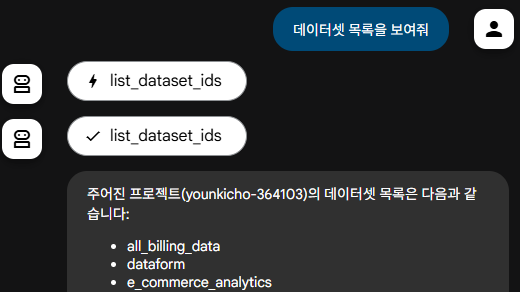

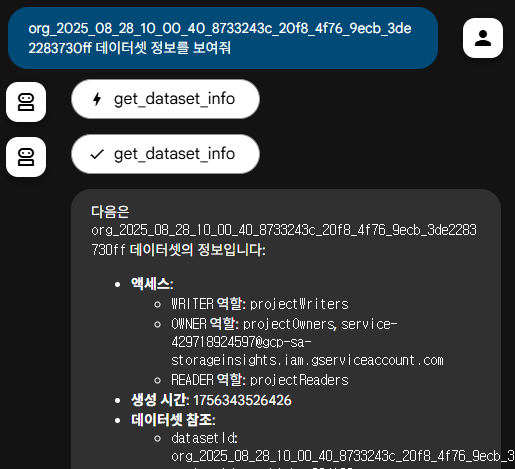

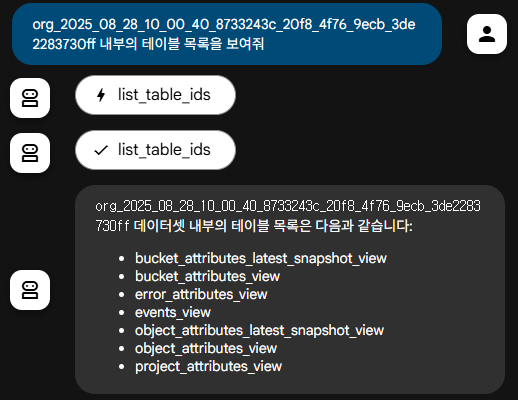

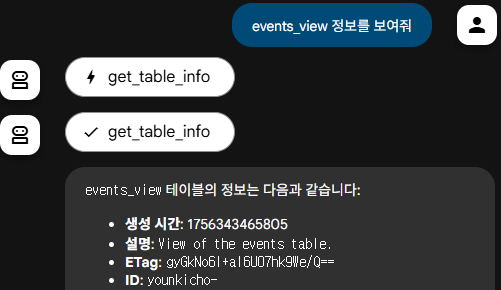

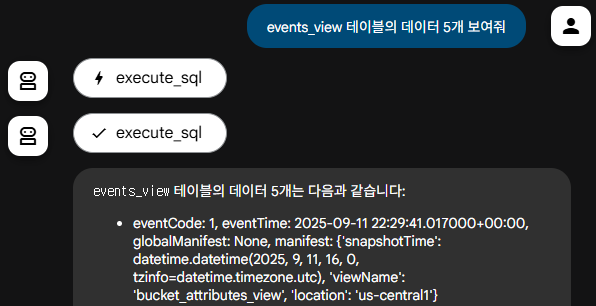

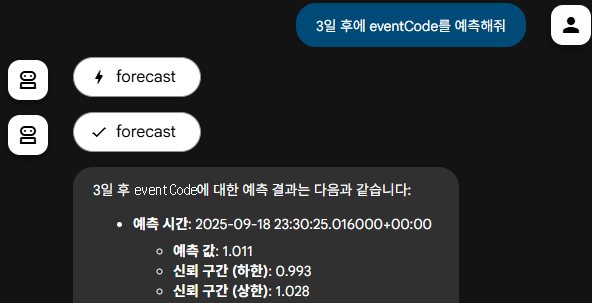

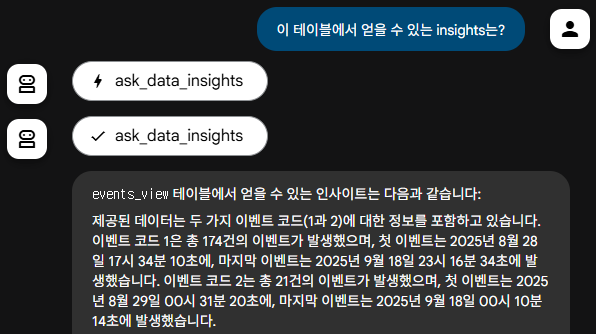

##3.2 ALLOWED

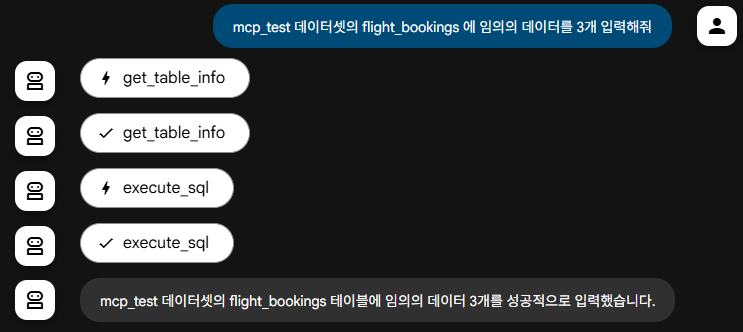

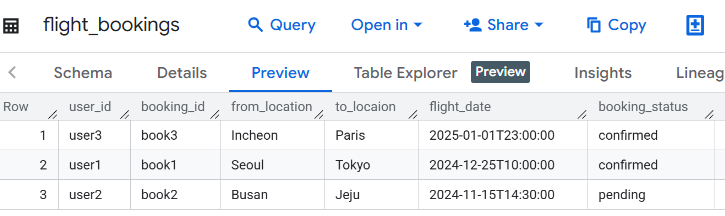

#4. reference


- https://google-auth.readthedocs.io/en/latest/reference/google.auth.html
- http://cloud.google.com/blog/products/ai-machine-learning/bigquery-meets-google-adk-and-mcp